In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../Data/train_1k.csv", header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# target 성립 확인 : 0.6이 넘어야 Target으로 성립  
train[0].value_counts().min() / train[0].value_counts().max()

0.7435897435897436

In [4]:
train.shape

(1001, 785)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 6.0 MB


#### Feature와 Target 분류 

In [6]:
train_target = train.loc[:,0]
train_data = train.loc[:,1:]

In [7]:
train_target = train.loc[:,train.columns == 0]
train_data = train.loc[:,train.columns != 0]

In [8]:
train_target.head()

,0
0,5
1,0
2,4
3,1
4,9


In [9]:
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Train의 내용 보기

In [10]:
import numpy as np

In [15]:
temp = np.array(train.loc[0,1:]).reshape(28, 28)
temp

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [18]:
# train의 컬럼 줄이기
tempColumns = []
count = 0

for i in range(29):
    if i % 2 == 1:
        for j in range(29):
            if j % 2 == 1:
                tempColumns.append(temp[i,j])
                count+=1
count

196

In [19]:
np.sqrt(196)

14.0

In [20]:
np.array(tempColumns).reshape(14,14)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,  18,  18, 136,  26, 255, 127,   0,
          0],
       [  0,   0,   0,  49, 253, 253, 253, 253, 251,  82,  56,   0,   0,
          0],
       [  0,   0,   0,   0, 156, 253, 205,   0, 154,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0, 139, 190,   0,   0,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 241, 160,   1,   0,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0, 186, 253,  27,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0,   0,   0, 249, 249,   0,   0,   0,
          0],
       [  0,   0,   0,   0,   0,   0, 148, 253, 253, 182,   0,   0,   0,
          0],
       [  0,   0,   0,   0,  66, 253, 253, 198,   2,   0,   0,   0,   0,
          0],
       [  0,   0, 172, 253, 253, 244,  11, 

In [22]:
test = pd.read_csv("../Data/test_1k.csv", header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
test_target = test.loc[:,0]
test_data = test.loc[:,1:]

In [25]:
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Machine Learning

#### SVC

In [26]:
from sklearn.svm import SVC

In [27]:
clf = SVC()
clf.fit(train_data, train_target)

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [28]:
print(clf.score(train_data, train_target))
print(clf.score(test_data, test_target))

0.9820179820179821
0.8751248751248751


In [29]:
import matplotlib.pyplot as plt

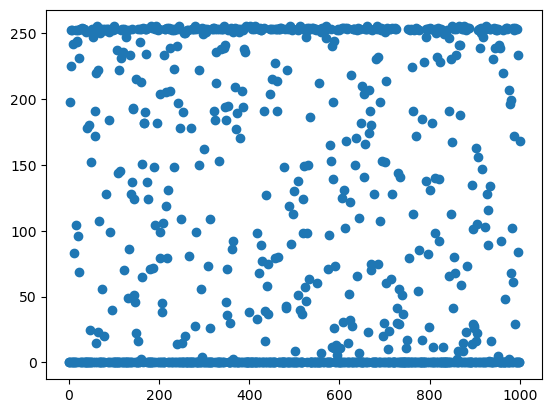

In [30]:
plt.scatter(
    train_data.index,
    train_data[300]
)

plt.show()

#### 로그변환 
: 로그는 태생적으로 큰값을 작게 표기 하기 위해 고안된 방법

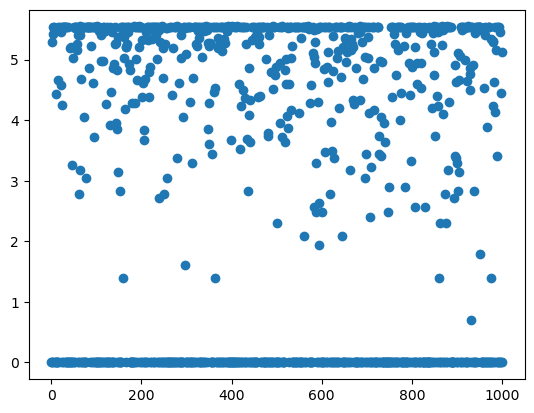

In [34]:
plt.scatter(
    train_data.index,
    np.log1p(train_data[300])
)
plt.show()

In [ ]:
# train data의 표준화
train_data = pd.DataFrame(np.log1p(train_data))
train_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [36]:
# test data의 표준화
test_data = pd.DataFrame(np.log1p(test_data))
test_data.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
clf = SVC()
clf.fit(train_data, train_target)

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [38]:
print(clf.score(train_data, train_target))
print(clf.score(test_data, test_target))

0.983016983016983
0.8901098901098901


#### RandomForest

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier()
rf.fit(train_data, train_target)

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [41]:
print(rf.score(train_data, train_target))
print(rf.score(test_data, test_target))

1.0
0.8611388611388612


### KNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
knn = KNeighborsClassifier()

In [44]:
knn.fit(train_data, train_target)
print(knn.score(train_data, train_target))
print(knn.score(test_data, test_target))

c:\Users\tj\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


0.9240759240759241
0.8411588411588412
